##Loading The Data

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import re
from tqdm import tqdm

We will now load the datasets using pandas by mentioning the path to the files residing in the drive as given below.

In [2]:
train = pd.read_csv("train_dataset.csv")
test = pd.read_csv("test_dataset.csv")

##Dataset Features

Before proceeding any further,lets have a look at the dataset and its basic features.


####Trainig Data

In [3]:
train.shape

(8875, 9)

In [4]:
train.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [5]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_3744,"Dockyard Road, Mumbai CST Area","Fast Food, Chinese",₹200,₹50,3.8,91,44,45 minutes
1,ID_5984,Delhi Cantt.,North Indian,₹100,₹50,2.9,37,16,30 minutes
2,ID_13,"MG Road, Pune","Continental, North Indian, Seafood, Cafe, Sala...",₹650,₹50,4.1,3860,1962,45 minutes
3,ID_643,"Delhi Administration Flats, Timarpur",Naga,₹250,₹50,3.9,313,119,45 minutes
4,ID_5754,Pune University,"Pizza, Fast Food",₹200,₹50,3.3,86,48,45 minutes


In [6]:
train.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [7]:
train.describe(include = 'all')

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,8875,8875,8875,8875,8875,8875,8875,8875,8875
unique,6363,35,1920,23,15,33,1024,711,7
top,ID_4625,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes
freq,16,753,681,2594,8115,961,1676,1859,5919


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8875 entries, 0 to 8874
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     8875 non-null   object
 1   Location       8875 non-null   object
 2   Cuisines       8875 non-null   object
 3   Average_Cost   8875 non-null   object
 4   Minimum_Order  8875 non-null   object
 5   Rating         8875 non-null   object
 6   Votes          8875 non-null   object
 7   Reviews        8875 non-null   object
 8   Delivery_Time  8875 non-null   object
dtypes: object(9)
memory usage: 624.2+ KB


####Test Data

In [9]:
test.shape

(2219, 8)

In [10]:
test.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews'],
      dtype='object')

In [11]:
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_3190,"Dockyard Road, Mumbai CST Area",Fast Food,₹100,₹50,-,-,-
1,ID_4249,"Mico Layout, Stage 2, BTM Layout,Bangalore","Beverages, Street Food",₹100,₹50,3.3,4,3
2,ID_6657,"Tejas Nagar Colony, Wadala West, Mumbai",South Indian,₹200,₹50,3.2,12,4
3,ID_2879,"Dockyard Road, Mumbai CST Area","South Indian, North Indian, Fast Food",₹200,₹50,3.7,182,107
4,ID_3638,Majestic,"Raw Meats, Naga",₹100,₹50,3.6,19,7


In [12]:
test.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
dtype: int64

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     2219 non-null   object
 1   Location       2219 non-null   object
 2   Cuisines       2219 non-null   object
 3   Average_Cost   2219 non-null   object
 4   Minimum_Order  2219 non-null   object
 5   Rating         2219 non-null   object
 6   Votes          2219 non-null   object
 7   Reviews        2219 non-null   object
dtypes: object(8)
memory usage: 138.8+ KB


In [14]:
test.describe(include = 'all')

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
count,2219,2219,2219,2219,2219,2219,2219,2219
unique,1974,35,757,23,11,30,508,358
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-
freq,7,194,169,647,2003,230,398,453


##Data Cleaning

We will consider the following features of training and test datasets. Here I have grouped the columns based on similarity of values which will make it easy for cleaning.

* Cleaning Average_Cost & Minimum_order columns to remove special characters and make them float variables.
* Location & Cuisines are categoriacal variables that needs to be cleaned before encoding.
* Rating, Votes & Reviews needs to be cleaned and converted to respective types.

We will delve deeper in the coming sections.



####Average_Cost	& Minimum_order

In [15]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_3744,"Dockyard Road, Mumbai CST Area","Fast Food, Chinese",₹200,₹50,3.8,91,44,45 minutes
1,ID_5984,Delhi Cantt.,North Indian,₹100,₹50,2.9,37,16,30 minutes
2,ID_13,"MG Road, Pune","Continental, North Indian, Seafood, Cafe, Sala...",₹650,₹50,4.1,3860,1962,45 minutes
3,ID_643,"Delhi Administration Flats, Timarpur",Naga,₹250,₹50,3.9,313,119,45 minutes
4,ID_5754,Pune University,"Pizza, Fast Food",₹200,₹50,3.3,86,48,45 minutes


In [16]:
#Finding the unique values in Average_Cost
train['Average_Cost'].unique()

array(['₹200', '₹100', '₹650', '₹250', '₹400', '₹150', '₹50', '₹600',
       '₹300', '₹350', '₹500', '₹450', '₹850', '₹750', '₹1,000', '₹700',
       '₹800', '₹550', '₹1,200', '₹900', 'for', '₹950', '₹1,150'],
      dtype=object)

The Average_Cost has an invalid value in one of its rows. We will replace it with 200 which is the most frequent value in the column.(Check the train.describe() method). We will add 200 as a string and not as an integer as the column is of type object and all its values are strings.

In [17]:
train[train['Average_Cost'] == 'for']

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
2102,ID_6472,Pune University,Fast Food,for,₹50,NEW,-,-,30 minutes


In [18]:
#replacing 'for' with 200
train['Average_Cost'].replace('for', '200', inplace = True)

Now we will clean all the values and will convert it in to integer. 

In [19]:
train['Average_Cost_Cleaned'] = train['Average_Cost'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [20]:
train['Average_Cost_Cleaned'].unique()

array([ 200,  100,  650,  250,  400,  150,   50,  600,  300,  350,  500,
        450,  850,  750, 1000,  700,  800,  550, 1200,  900,  950, 1150],
      dtype=int64)

We can see that all the special characters ahave been removed and strings have been converted to integers.

---

Let's perform the same operations on the test set


In [21]:
test['Average_Cost'].unique()

array(['₹100', '₹200', '₹350', '₹50', '₹150', '₹650', '₹600', '₹300',
       '₹500', '₹1,000', '₹400', '₹250', '₹450', '₹550', '₹800', '₹750',
       '₹900', '₹1,100', '₹850', '₹1,200', '₹1,400', '₹2,050', '₹700'],
      dtype=object)

In [22]:
test['Average_Cost_Cleaned'] = test['Average_Cost'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [23]:
test['Average_Cost_Cleaned'].unique()

array([ 100,  200,  350,   50,  150,  650,  600,  300,  500, 1000,  400,
        250,  450,  550,  800,  750,  900, 1100,  850, 1200, 1400, 2050,
        700], dtype=int64)

Now lets do the same for Minimum_Order column

In [24]:
train['Minimum_Order'].unique()

array(['₹50', '₹99', '₹0', '₹350', '₹299', '₹199', '₹300', '₹200', '₹150',
       '₹90', '₹89', '₹59', '₹450', '₹240', '₹79'], dtype=object)

In [25]:
train['Minimum_Order_Cleaned'] = train['Minimum_Order'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [26]:
test['Minimum_Order'].unique()

array(['₹50', '₹99', '₹500', '₹0', '₹59', '₹300', '₹299', '₹250', '₹199',
       '₹200', '₹400'], dtype=object)

In [27]:
test['Minimum_Order_Cleaned'] = test['Minimum_Order'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [28]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned
0,ID_3744,"Dockyard Road, Mumbai CST Area","Fast Food, Chinese",₹200,₹50,3.8,91,44,45 minutes,200,50
1,ID_5984,Delhi Cantt.,North Indian,₹100,₹50,2.9,37,16,30 minutes,100,50
2,ID_13,"MG Road, Pune","Continental, North Indian, Seafood, Cafe, Sala...",₹650,₹50,4.1,3860,1962,45 minutes,650,50
3,ID_643,"Delhi Administration Flats, Timarpur",Naga,₹250,₹50,3.9,313,119,45 minutes,250,50
4,ID_5754,Pune University,"Pizza, Fast Food",₹200,₹50,3.3,86,48,45 minutes,200,50


####Location & CUISINES

Location and Cuisines are categorical variables that need to be encoded later. By looking at the dataset, we can see that each of these columns have multiple values in them. We can use each of them as a feature by splitting each column into n number of features.
To do that we will first find the maximum number(n) of features a column has in the entire dataset including both test and train data. Once the maximum number of features within a cell is found, we will split all the rows in the dataset for that specific column into n features. 


In [29]:
#A function to find the maximun number of features in a single cell
def max_features_in_single_row(train, test, delimiter):
  max_info = 0 
  item_lis = list(train._append(test))
  for i in item_lis:
    if len(i.split("{}".format(delimiter))) > max_info:
      max_info = len(i.split("{}".format(delimiter)))
  print("\n","-"*35)    
  print("Max_Features in One Observation = ", max_info)
  return max_info

In [30]:
#This function splits a column in to n features where n is the maximum number of features in a single cell
def feature_splitter(feat, name, delimiter, max_info):
  item_lis = list(feat)
  extracted_features = {}

  for i in range(max_info):
    extracted_features['{}_Feature_{}'.format(name, i+1)] = []
  
  print("-"*35)
  print("Features Dictionary : ", extracted_features)

  for i in tqdm(range(len(item_lis))):
    for j in range(max_info):  
      try:
        extracted_features['{}_Feature_{}'.format(name,j+1)].append(item_lis[i].split("{}".format(delimiter))[j].lower().strip())
      except: 
        extracted_features['{}_Feature_{}'.format(name, j+1)].append(np.nan)


  return extracted_features


In [31]:
#Splitting Location
loc_max = max_features_in_single_row(test['Location'],train['Location'], ',')
train_Location_splits = feature_splitter(train['Location'], 'Location', ',', loc_max)
test_Location_splits = feature_splitter(test['Location'], 'Location', ',', loc_max)



 -----------------------------------
Max_Features in One Observation =  4
-----------------------------------
Features Dictionary :  {'Location_Feature_1': [], 'Location_Feature_2': [], 'Location_Feature_3': [], 'Location_Feature_4': []}


100%|███████████████████████████████████████████████████████████████████████████| 8875/8875 [00:00<00:00, 77579.86it/s]


-----------------------------------
Features Dictionary :  {'Location_Feature_1': [], 'Location_Feature_2': [], 'Location_Feature_3': [], 'Location_Feature_4': []}


100%|███████████████████████████████████████████████████████████████████████████| 2219/2219 [00:00<00:00, 62535.93it/s]


In [32]:
#Splitting Cuisines
cus_max = max_features_in_single_row(test['Cuisines'],train['Cuisines'], ',')
train_Cuisines_splits = feature_splitter(train['Cuisines'], 'Cuisines', ',', cus_max)
test_Cuisines_splits = feature_splitter(test['Cuisines'], 'Cuisines', ',', cus_max)


 -----------------------------------
Max_Features in One Observation =  8
-----------------------------------
Features Dictionary :  {'Cuisines_Feature_1': [], 'Cuisines_Feature_2': [], 'Cuisines_Feature_3': [], 'Cuisines_Feature_4': [], 'Cuisines_Feature_5': [], 'Cuisines_Feature_6': [], 'Cuisines_Feature_7': [], 'Cuisines_Feature_8': []}


100%|███████████████████████████████████████████████████████████████████████████| 8875/8875 [00:00<00:00, 32075.50it/s]


-----------------------------------
Features Dictionary :  {'Cuisines_Feature_1': [], 'Cuisines_Feature_2': [], 'Cuisines_Feature_3': [], 'Cuisines_Feature_4': [], 'Cuisines_Feature_5': [], 'Cuisines_Feature_6': [], 'Cuisines_Feature_7': [], 'Cuisines_Feature_8': []}


100%|███████████████████████████████████████████████████████████████████████████| 2219/2219 [00:00<00:00, 27452.65it/s]


####Rating, Votes & Reviews

We will now clean Rating, Votes & Reviews columns to remove invalid values and to convert them to the right type.

In [33]:
train.describe(include = 'all')

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned
count,8875,8875,8875,8875,8875,8875,8875,8875,8875,8875.000000,8875.000000
unique,6363,35,1920,23,15,33,1024,711,7,NaN,NaN
top,ID_4625,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes,NaN,NaN
freq,16,753,681,2594,8115,961,1676,1859,5919,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.059155,53.219155
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.385830,17.803072
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.000000,50.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.000000,50.000000


In [34]:
#A function to find all the non numeric values
def non_numerals(series):
  non_numerals = []
  for i in series.unique():
    try :
      i = float(i)
    except:
      non_numerals.append(i)
  return non_numerals

In [35]:
# A function to replace the non-numeric values
def replace_nn_with(series, type_, fill_with = None, method = 'mean'):

  nn = non_numerals(series)
  print('-'*30)
  print('-'*30)
  print("Non Numerals in column ",series.name," : ",nn)

  series = series.replace(nn, np.nan, inplace = False)
  nulls = series.isnull().sum()
  if fill_with:
    series.fillna(fill_with, inplace = True)
    print("Filling Non Numerals with {}".format(fill_with))
  
  else:
    series = series.replace(nn, np.nan, inplace = False)

    if method == 'mean' :
      rep = series.astype(float).mean()
      print("Filling Non Numerals with MEAN = ", rep)

    elif method == 'median' :
      rep = series.astype(float).median()
      print("Filling Non Numerals with MEDIAN = ", rep)

    elif method == 'min' :
      rep = series.astype(float).min()
      print("Filling Non Numerals with MINIMUM = ", rep)

    else:
      print('Please pass a valid method as a string -- ("mean" or "median" or "min")')
      return 0

    series.fillna(rep, inplace = True)
    
  try:
    series = series.astype(type_)
    print(nulls, ": observations replaced")
    return series
  except:
    # Since type conversion of a string containting decimals to int is not possible, it is first converted to float
    series =  series.astype(float)
    print(nulls, ": observations replaced")
    series =  series.astype(type_)
    return series
    


In [36]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned
0,ID_3744,"Dockyard Road, Mumbai CST Area","Fast Food, Chinese",₹200,₹50,3.8,91,44,45 minutes,200,50
1,ID_5984,Delhi Cantt.,North Indian,₹100,₹50,2.9,37,16,30 minutes,100,50
2,ID_13,"MG Road, Pune","Continental, North Indian, Seafood, Cafe, Sala...",₹650,₹50,4.1,3860,1962,45 minutes,650,50
3,ID_643,"Delhi Administration Flats, Timarpur",Naga,₹250,₹50,3.9,313,119,45 minutes,250,50
4,ID_5754,Pune University,"Pizza, Fast Food",₹200,₹50,3.3,86,48,45 minutes,200,50


Lets Clean the columns

In [37]:
train['Rating_Cleaned'] = replace_nn_with(train['Rating'],float, method = 'mean')

------------------------------
------------------------------
Non Numerals in column  Rating  :  ['NEW', '-', 'Temporarily Closed', 'Opening Soon']
Filling Non Numerals with MEAN =  3.618973796131156
1586 : observations replaced


In [38]:
test['Rating_Cleaned'] = replace_nn_with(test['Rating'],float, fill_with = 3.6134596429744668)

------------------------------
------------------------------
Non Numerals in column  Rating  :  ['-', 'NEW', 'Opening Soon']
Filling Non Numerals with 3.6134596429744668
377 : observations replaced


In [39]:
train['Votes_Cleaned'] = replace_nn_with(train['Votes'],int,method =  'mean')


------------------------------
------------------------------
Non Numerals in column  Votes  :  ['-']
Filling Non Numerals with MEAN =  253.60161133490763
1676 : observations replaced


In [40]:
test['Votes_Cleaned'] = replace_nn_with(test['Votes'],int,fill_with = 244.54445676274943)

------------------------------
------------------------------
Non Numerals in column  Votes  :  ['-']
Filling Non Numerals with 244.54445676274943
398 : observations replaced


In [41]:
train['Reviews_Cleaned'] = replace_nn_with(train['Reviews'],int, method =  'mean')

------------------------------
------------------------------
Non Numerals in column  Reviews  :  ['-']
Filling Non Numerals with MEAN =  127.1063283922463
1859 : observations replaced


In [42]:
test['Reviews_Cleaned'] = replace_nn_with(test['Reviews'],int, method =  'mean',fill_with = 123.247893 )

------------------------------
------------------------------
Non Numerals in column  Reviews  :  ['-']
Filling Non Numerals with 123.247893
453 : observations replaced


In [43]:
train.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned,Rating_Cleaned,Votes_Cleaned,Reviews_Cleaned
0,ID_3744,"Dockyard Road, Mumbai CST Area","Fast Food, Chinese",₹200,₹50,3.8,91,44,45 minutes,200,50,3.8,91,44
1,ID_5984,Delhi Cantt.,North Indian,₹100,₹50,2.9,37,16,30 minutes,100,50,2.9,37,16
2,ID_13,"MG Road, Pune","Continental, North Indian, Seafood, Cafe, Sala...",₹650,₹50,4.1,3860,1962,45 minutes,650,50,4.1,3860,1962
3,ID_643,"Delhi Administration Flats, Timarpur",Naga,₹250,₹50,3.9,313,119,45 minutes,250,50,3.9,313,119
4,ID_5754,Pune University,"Pizza, Fast Food",₹200,₹50,3.3,86,48,45 minutes,200,50,3.3,86,48


In [44]:
train.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'Average_Cost_Cleaned',
       'Minimum_Order_Cleaned', 'Rating_Cleaned', 'Votes_Cleaned',
       'Reviews_Cleaned'],
      dtype='object')

We are done with the cleaning part and now we will select only the columns we need for further stages. 

In [45]:
cols = ['Restaurant',  'Average_Cost_Cleaned',
       'Minimum_Order_Cleaned', 'Rating_Cleaned', 'Votes_Cleaned',
       'Reviews_Cleaned','Delivery_Time' ]

In [46]:
train_sample = train[cols]
test_sample = test[cols[:-1]]

We will now merge all the cleaned features to form a perfect dataframe

In [47]:
train_sample = pd.concat([pd.DataFrame(train_Location_splits), pd.DataFrame(train_Cuisines_splits),train_sample],sort=False,axis = 1)
test_sample = pd.concat([pd.DataFrame(test_Location_splits), pd.DataFrame(test_Cuisines_splits), test_sample],sort=False,axis = 1)

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

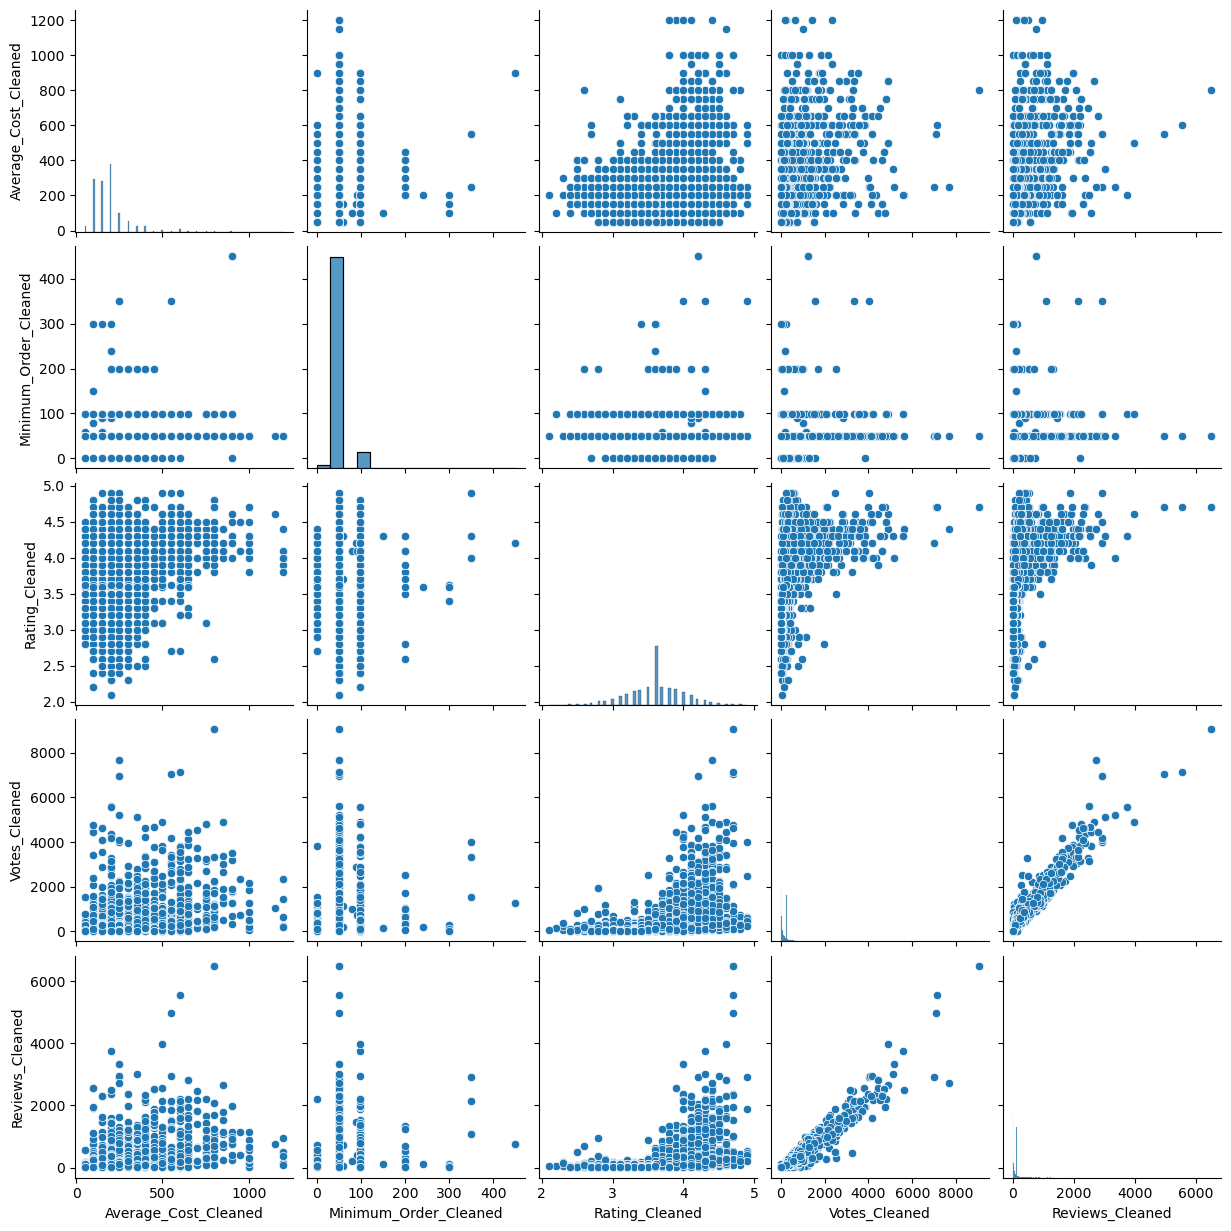

In [48]:
#lets take a look at the relation between the numeric features in the dataset
import seaborn
seaborn.pairplot(train_sample)

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

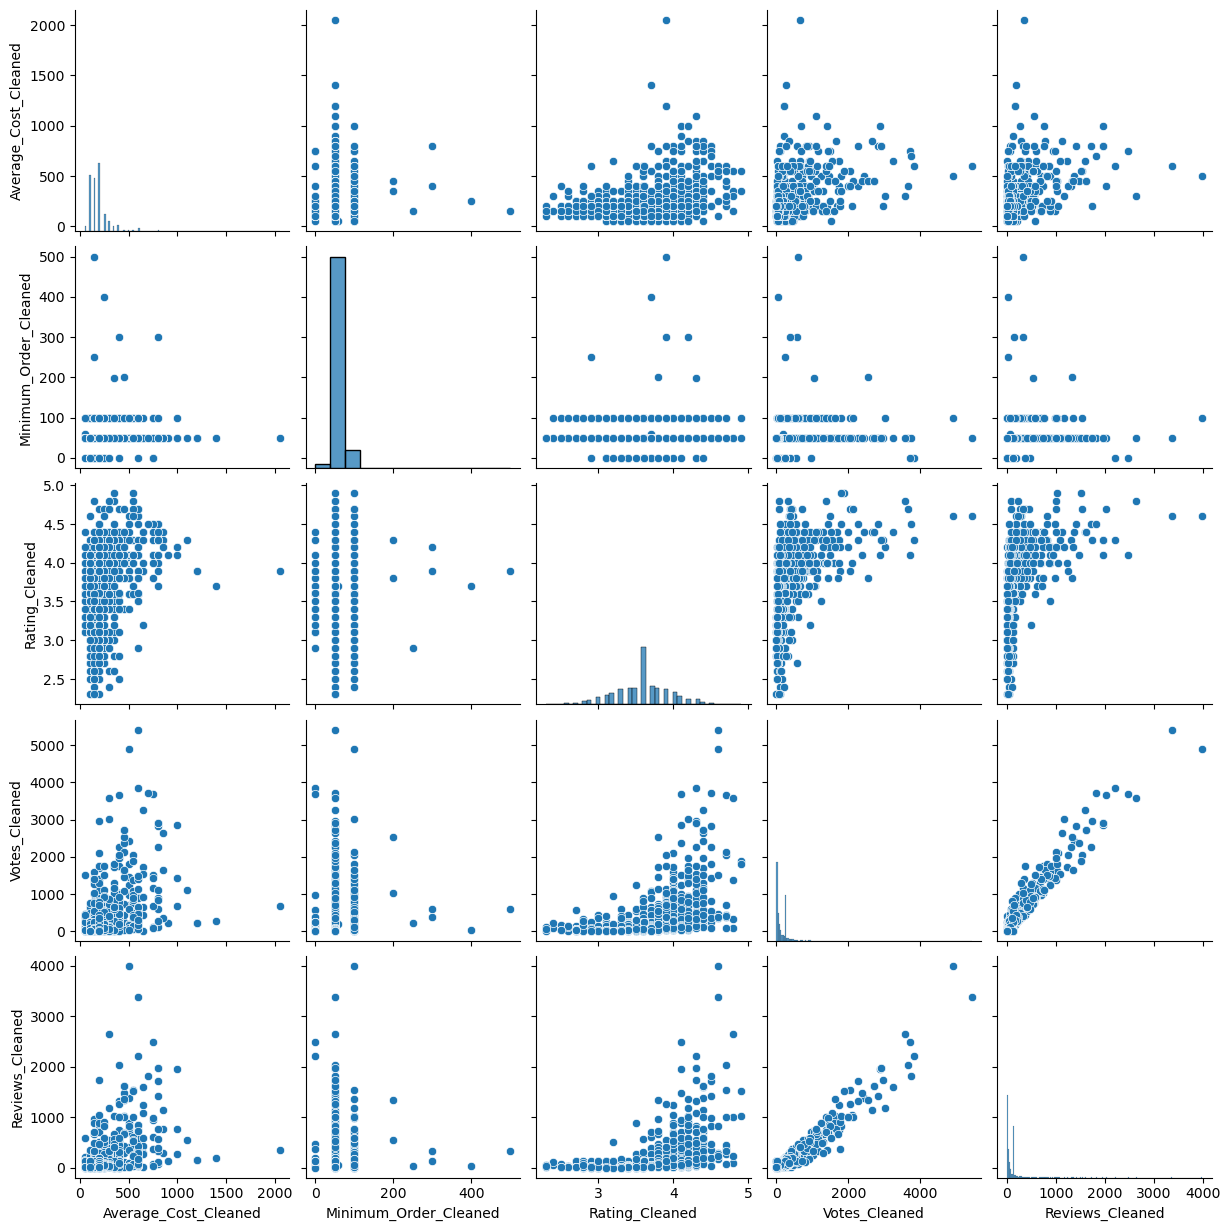

In [49]:
seaborn.pairplot(test_sample)

##Data Preprocessing

After cleaning, there are still some Data-Preparation tasks left. We still have some missing values that we allotted during the feature generation.

In the Preprocessing stage we will perform the following :

* Dealing with Nulls/empty cells
* Encoding Categorical variables
* Scaling the features

### Removing Nulls

In [50]:
train_sample.isnull().sum()

Location_Feature_1          0
Location_Feature_2       1566
Location_Feature_3       5103
Location_Feature_4       8058
Cuisines_Feature_1          0
Cuisines_Feature_2       2383
Cuisines_Feature_3       5521
Cuisines_Feature_4       7502
Cuisines_Feature_5       8368
Cuisines_Feature_6       8687
Cuisines_Feature_7       8787
Cuisines_Feature_8       8836
Restaurant                  0
Average_Cost_Cleaned        0
Minimum_Order_Cleaned       0
Rating_Cleaned              0
Votes_Cleaned               0
Reviews_Cleaned             0
Delivery_Time               0
dtype: int64

Since the nulls are present only in the categorical features, in this approach, to make it simple I will just replace all the NaNs with a string 'NAN' and will use it as a added category or class.

In [51]:
train_sample.fillna('NAN', inplace = True)

In [52]:
train_sample.isnull().sum()

Location_Feature_1       0
Location_Feature_2       0
Location_Feature_3       0
Location_Feature_4       0
Cuisines_Feature_1       0
Cuisines_Feature_2       0
Cuisines_Feature_3       0
Cuisines_Feature_4       0
Cuisines_Feature_5       0
Cuisines_Feature_6       0
Cuisines_Feature_7       0
Cuisines_Feature_8       0
Restaurant               0
Average_Cost_Cleaned     0
Minimum_Order_Cleaned    0
Rating_Cleaned           0
Votes_Cleaned            0
Reviews_Cleaned          0
Delivery_Time            0
dtype: int64

In [53]:
train_sample.isnull().sum()

Location_Feature_1       0
Location_Feature_2       0
Location_Feature_3       0
Location_Feature_4       0
Cuisines_Feature_1       0
Cuisines_Feature_2       0
Cuisines_Feature_3       0
Cuisines_Feature_4       0
Cuisines_Feature_5       0
Cuisines_Feature_6       0
Cuisines_Feature_7       0
Cuisines_Feature_8       0
Restaurant               0
Average_Cost_Cleaned     0
Minimum_Order_Cleaned    0
Rating_Cleaned           0
Votes_Cleaned            0
Reviews_Cleaned          0
Delivery_Time            0
dtype: int64

In [54]:
test_sample.fillna('NAN', inplace = True)

In [55]:
train_sample.isnull().sum()

Location_Feature_1       0
Location_Feature_2       0
Location_Feature_3       0
Location_Feature_4       0
Cuisines_Feature_1       0
Cuisines_Feature_2       0
Cuisines_Feature_3       0
Cuisines_Feature_4       0
Cuisines_Feature_5       0
Cuisines_Feature_6       0
Cuisines_Feature_7       0
Cuisines_Feature_8       0
Restaurant               0
Average_Cost_Cleaned     0
Minimum_Order_Cleaned    0
Rating_Cleaned           0
Votes_Cleaned            0
Reviews_Cleaned          0
Delivery_Time            0
dtype: int64

### Encoding Categories



---

Here we will use a simple Label Encoder to transform all the strings or categories.

####Locations & Cuisines

We will first find the unique values or categories in each of the categorical features and fit the label encoder with the unique values. The encoder eill assign an integer code to each of the categories which can be used to tranform the entire categorical feature column.

In [56]:
temp1 = []
for i in train_Cuisines_splits.keys():
  for j in train_Cuisines_splits.get(i):
    temp1.append(j)

temp2 = []
for i in test_Cuisines_splits.keys():
  for j in test_Cuisines_splits.get(i):
    temp2.append(j)

temp1.extend(temp2)

unique_cuisines = list(pd.Series(temp1).unique())
unique_cuisines.append('NAN')

**Note:**
We are also adding an extra category called NAN that we used to replace the NaN values.

In [57]:
len(unique_cuisines)

103

The location is a tricky feature. You can use external data to fill the missing data. For example, if the city is missing you can use the street name and try to find the City for the missing fields.

For simplicity, here I have followed the same approach as I did for Cuisines which is not a perfect solution.

In [58]:
temp1 = []
for i in train_Location_splits.keys():
  for j in train_Location_splits.get(i):
    temp1.append(j)

temp2 = []
for i in test_Location_splits.keys():
  for j in test_Location_splits.get(i):
    temp2.append(j)

temp1.extend(temp2)

unique_locations = list(pd.Series(temp1).unique())
unique_locations.append('NAN')

In [59]:
len(unique_locations)

67

In [60]:
#encoding the categorical Features
from sklearn.preprocessing import LabelEncoder
le_c = LabelEncoder().fit(unique_cuisines)
le_l = LabelEncoder().fit(unique_locations)

In [61]:
for i in train_Location_splits.keys():
  train_sample[i] = le_l.transform(train_sample[i])

In [62]:

for i in train_Cuisines_splits.keys():
  train_sample[i] = le_c.transform(train_sample[i])

In [63]:
for i in train_Location_splits.keys():
  test_sample[i] = le_l.transform(test_sample[i])

In [64]:
for i in test_Cuisines_splits.keys():
  test_sample[i] = le_c.transform(test_sample[i])

####Restaurant IDs

We will follow a similar approach for encoding the Restaurant IDs

In [65]:
t1 = list(train_sample['Restaurant'])
t2 = list(test_sample['Restaurant'])

t1.extend(t2)
unique_ids = list(set(t1))

In [66]:
len(unique_ids)

7480

In [67]:
le_id = LabelEncoder().fit(unique_ids)

In [68]:
train_sample['Restaurant'] = le_id.transform(train_sample['Restaurant'])
test_sample['Restaurant'] = le_id.transform(test_sample['Restaurant'])

### Scaling

We will now normalize the data using the StandardScaler

In [69]:
cols = list(train_sample.columns)

In [70]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [71]:
train_sample[cols[:-1]] = ss.fit_transform(train_sample[cols[:-1]])

In [72]:
test_sample[cols[:-1]] = ss.fit_transform(test_sample[cols[:-1]])

In [73]:
train_sample.head()

,Location_Feature_1,Location_Feature_2,Location_Feature_3,Location_Feature_4,Cuisines_Feature_1,Cuisines_Feature_2,Cuisines_Feature_3,Cuisines_Feature_4,Cuisines_Feature_5,Cuisines_Feature_6,Cuisines_Feature_7,Cuisines_Feature_8,Restaurant,Average_Cost_Cleaned,Minimum_Order_Cleaned,Rating_Cleaned,Votes_Cleaned,Reviews_Cleaned,Delivery_Time
0,-0.980479,0.177867,-0.660952,-0.16102,-0.725688,-0.224932,-0.624804,-0.36029,-0.203607,-0.123402,-0.083227,-0.05786,-0.526235,-0.023829,-0.18083,0.483555,-0.312440,-0.281946,45 minutes
1,-1.139103,-1.665295,-0.660952,-0.16102,0.813633,-1.119289,-0.624804,-0.36029,-0.203607,-0.123402,-0.083227,-0.05786,0.466041,-0.802775,-0.18083,-1.920514,-0.416274,-0.376964,30 minutes
2,0.024135,0.614406,-0.660952,-0.16102,-0.835640,1.331912,2.508856,0.79300,6.207189,3.422604,-0.083227,-0.05786,-1.599352,3.481428,-0.18083,1.284911,6.934786,6.226797,45 minutes
3,-1.191977,1.341970,-0.660952,-0.16102,0.667031,-1.119289,-0.624804,-0.36029,-0.203607,-0.123402,-0.083227,-0.05786,0.661909,0.365644,-0.18083,0.750674,0.114433,-0.027433,45 minutes
4,0.817251,-1.665295,-0.660952,-0.16102,0.960235,-0.059310,-0.624804,-0.36029,-0.203607,-0.123402,-0.083227,-0.05786,0.364873,-0.023829,-0.18083,-0.852039,-0.322055,-0.268372,45 minutes


In [74]:
test_sample.head()

,Location_Feature_1,Location_Feature_2,Location_Feature_3,Location_Feature_4,Cuisines_Feature_1,Cuisines_Feature_2,Cuisines_Feature_3,Cuisines_Feature_4,Cuisines_Feature_5,Cuisines_Feature_6,Cuisines_Feature_7,Cuisines_Feature_8,Restaurant,Average_Cost_Cleaned,Minimum_Order_Cleaned,Rating_Cleaned,Votes_Cleaned,Reviews_Cleaned
0,-0.942852,0.155271,-0.658694,-0.162884,-0.671448,-1.102410,-0.608594,-0.358018,-0.211737,-0.131775,-0.095667,-0.053948,-0.733454,-0.747884,-0.180773,0.047502,0.070284,0.048872
1,0.111439,1.222276,-0.454447,0.784531,-1.286485,1.922748,-0.608594,-0.358018,-0.211737,-0.131775,-0.095667,-0.053948,-0.259800,-0.747884,-0.180773,-0.774554,-0.512642,-0.439756
2,1.534733,1.416277,1.179528,-0.162884,1.390733,-1.102410,-0.608594,-0.358018,-0.211737,-0.131775,-0.095667,-0.053948,0.811373,-0.009648,-0.180773,-1.036806,-0.493211,-0.435684
3,-0.942852,0.155271,-0.658694,-0.162884,1.390733,1.304705,0.562736,-0.358018,-0.211737,-0.131775,-0.095667,-0.053948,-0.873092,-0.009648,-0.180773,0.274456,-0.080305,-0.016278
4,-0.152133,-1.687738,-0.658694,-0.162884,1.137482,1.174591,-0.608594,-0.358018,-0.211737,-0.131775,-0.095667,-0.053948,-0.533972,-0.747884,-0.180773,0.012203,-0.476209,-0.423469


##Modeling

Finally, we are ready for modeling. We will split the training set into training and validation sets.

We will then use the training set to train and validation set to test the performance of the model.

Finally we will use the given test set for predicting.




In [75]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train_sample, test_size = 0.1, random_state = 123)

In [76]:
X_train = train[cols[:-1]]
Y_train = train[cols[-1]]

X_Val = val[cols[:-1]]
Y_Val = val[cols[-1]]

X_test = test_sample[cols[:-1]]

In [77]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train,Y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got ['10 minutes' '120 minutes' '20 minutes' '30 minutes' '45 minutes'
 '65 minutes' '80 minutes']

In [ ]:
xgb.score(X_Val,Y_Val)


---

This is a baseline model. Fine tuning the model can give better results. Also, tryout different algorithms to find the best.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
clf.fit(X_train,Y_train)
clf.score(X_Val,Y_Val)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rforest = RandomForestClassifier()

In [ ]:
Rforest.fit(X_train,Y_train)
Rforest.score(X_Val,Y_Val)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Predictions = Rforest.predict(X_test)

In [ ]:
pd.DataFrame(Predictions, columns = ['Delivery_Time']).to_excel("/GD/My Drive/Colab Notebooks/Food Delivery/Participants Data/Submission.xlsx", index = False)